In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read the training & testing data
train_data = pd.read_csv(r'C:\Users\GM\Desktop\risk_analytics_train.csv',index_col=0,header=0)
test_data=pd.read_csv(r'C:\Users\GM\Desktop\risk_analytics_test.csv',index_col=0,header=0)


# Preprocessing the training data

In [4]:
print(train_data.shape)
print(test_data.shape)

(614, 12)
(367, 11)


In [5]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
test_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.000000,367.000000,367.000000,362.000000,361.000000,338.000000
mean,0.829132,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,1.071302,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
#imputing categorical missing data with mode value

colname1=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]

for x in colname1:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)
    

In [11]:
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
#imputing numerical missing data with mean value
train_data["LoanAmount"].fillna(round(train_data["LoanAmount"].mean(),0),inplace=True)
test_data["LoanAmount"].fillna(round(test_data["LoanAmount"].mean(),0),inplace=True)

print(train_data.isnull().sum())

print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [14]:
train_data.Credit_History.mode()

0    1.0
dtype: float64

In [15]:
#imputing values  for Credit_History column differently
train_data["Credit_History"].fillna(value=0,inplace=True)
test_data["Credit_History"].fillna(value=0,inplace=True)

print(train_data.isnull().sum())

print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [16]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

le=LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

In [17]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [32]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=["Gender","Married","Education","Self_Employed","Property_Area"]

le=LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

In [33]:
test_data.head()

#converted Loan status as Y-->1 and N-->0

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


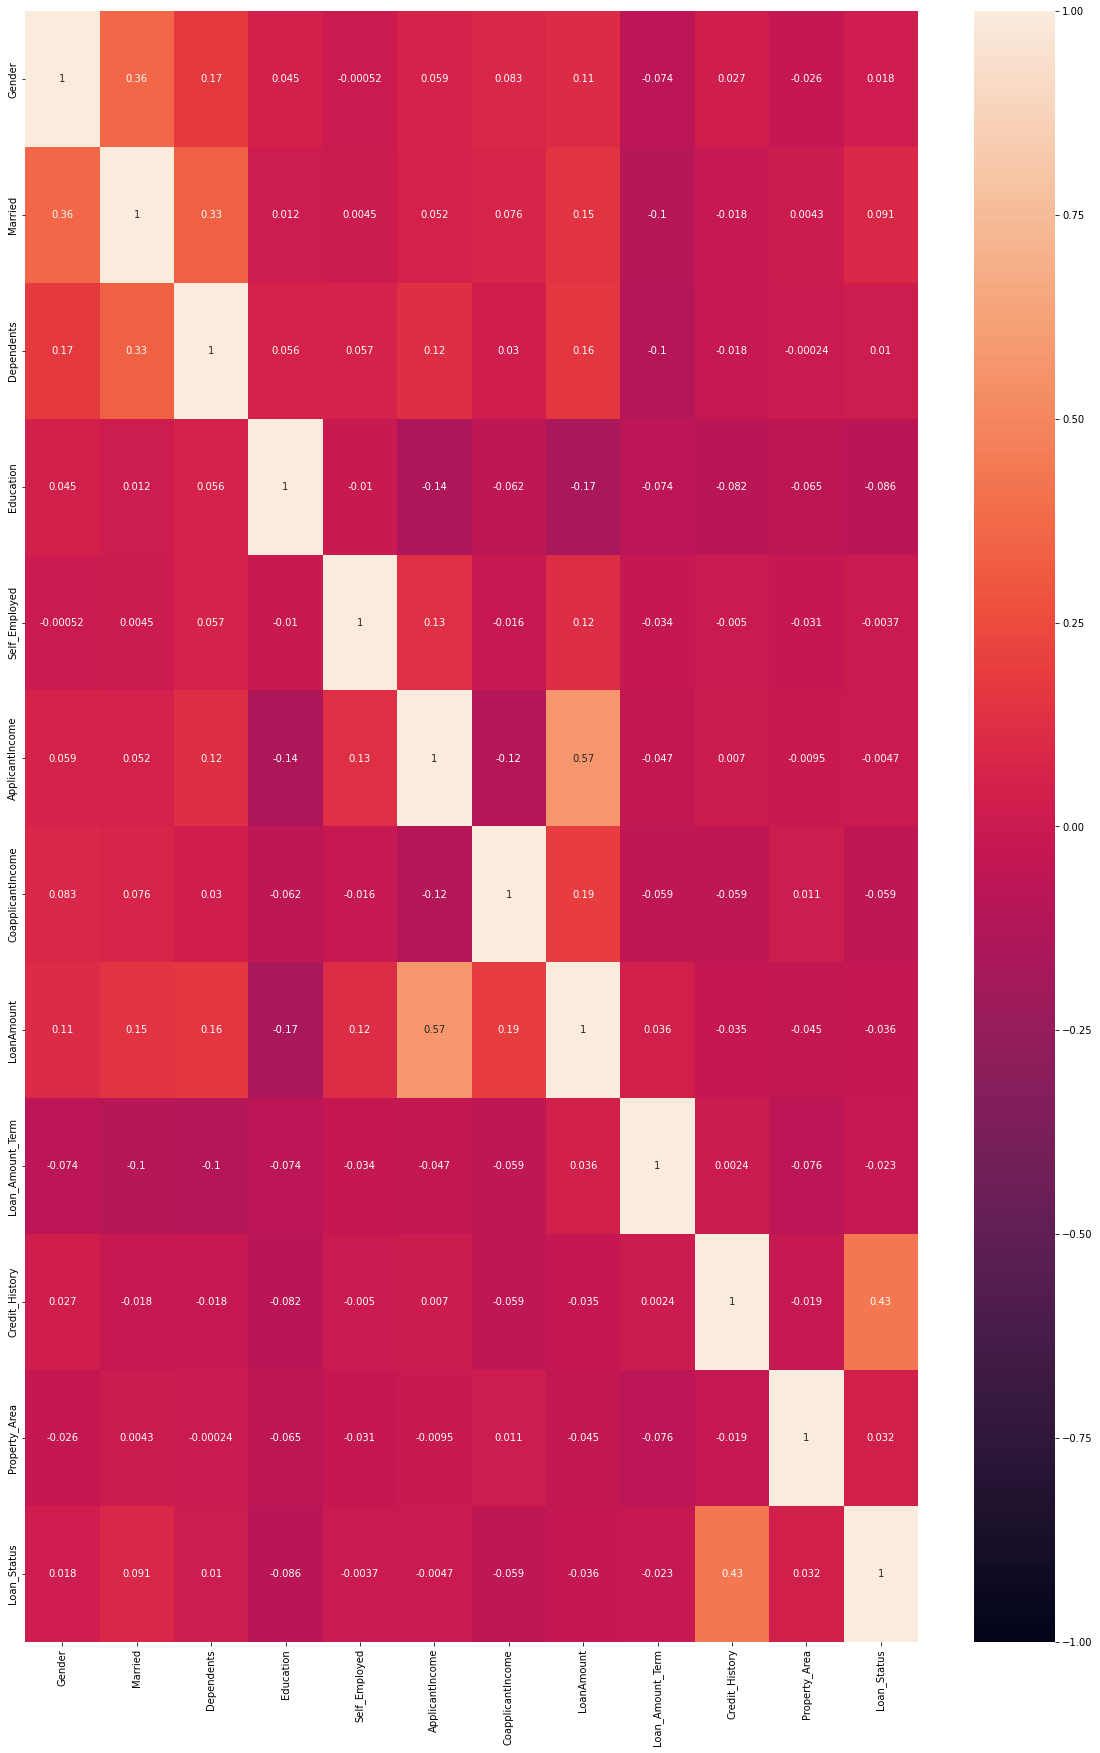

In [34]:
corr_df=train_data.corr()
corr_df

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)



plt.show()

# Creating training and testing datasets and running the model

In [35]:
X_train=train_data.values[:,0:-1]
Y_train=train_data.values[:,-1]
Y_train=Y_train.astype(int)

In [36]:
X_train.shape

(614, 11)

In [37]:
#test_data.head()
#not to split into X & Y bcoz there no dependent variable or Y column present in the test data
X_test=test_data.values[:,:]

In [38]:
X_test.shape

(367, 11)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [40]:
print(X_train)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]]


In [41]:
print(X_test)

[[ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264 -1.37208932 -0.73780632 ... -2.52283563  0.54095432
  -1.31851281]]


In [89]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [71]:
svc_model.score(X_train,Y_train)

#score-->
#Y_pred=svc_model.predict(X_train)
#accuracy_score(Y_train,Y_pred)

0.7768729641693811

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=svc_model.predict(X_train)
confusion_matrix(Y_train,Y_pred_new)

print(classification_report(Y_train,Y_pred_new))

#We wont find the accuracy score bcoz our test data does not consist of Y values


              precision    recall  f1-score   support

           0       0.70      0.51      0.59       192
           1       0.80      0.90      0.85       422

    accuracy                           0.78       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.77      0.78      0.77       614



In [73]:
"""
Y-->1-->Eligible
N-->0-->Not Eligible

"""

'\nY-->1-->Eligible\nN-->0-->Not Eligible\n\n'

In [74]:
test_data=pd.read_csv(r'risk_analytics_test.csv',header=0)
test_data["Y_predictions"]=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [75]:
test_data["Y_predictions"]=test_data["Y_predictions"].map({1:"Eligible",0:"Not Eligible"})

In [76]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Not Eligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


In [77]:
test_data.to_excel(r'test_data_output.xls',index=False)

C:\Users\Jagruti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [78]:
test_data.Y_predictions.value_counts()

Eligible        280
Not Eligible     87
Name: Y_predictions, dtype: int64